In [6]:
using Random
using LinearAlgebra
using PyPlot

function generate_matrix(l::Int, r::Int, n::Int)    
    return rand(n, n) .* (r - l) .+ l
end

generate_matrix (generic function with 1 method)

In [100]:
function naive_matrix_multiply(A, B)
    A = copy(A)
    B = copy(B)
    n, m = size(A)
    m2, p = size(B)

    if m != m2
        print("Невозможно перемножить матрицы из-за их размерностей")
    end

    C = zeros(n, p)
    for i in 1:n
        for j in 1:p
            for k in 1:m
                C[i, j] += A[i, k] * B[k, j]
            end
        end
    end

    return C
end

A = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]
B = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]

C = naive_matrix_multiply(A, B)
println(C)

[90.0 100.0 110.0 120.0; 202.0 228.0 254.0 280.0; 314.0 356.0 398.0 440.0; 426.0 484.0 542.0 600.0]


In [116]:
function vinograd(A, B)
    m, n = size(A)
    n2, p = size(B)

    if n != n2
        print("Невозможно перемножить матрицы из-за их размерностей")
    end
    
    C = zeros(Float64, m, p)
    row_factors = zeros(Float64, m)
    col_factors = zeros(Float64, p)
    
    for i in 1:m
        row_factors[i] = sum(A[i, 2k-1] * A[i, 2k] for k in 1:div(n, 2))
    end

    for j in 1:p
        col_factors[j] = sum(B[2k-1, j] * B[2k, j] for k in 1:div(n, 2))
    end

    for i in 1:m
        for j in 1:p
            s = -row_factors[i] - col_factors[j]
            C[i, j] = s + sum((A[i, 2k-1] + B[2k, j]) * (A[i, 2k] + B[2k-1, j]) for k in 1:div(n, 2))
        end
    end

    return C
end

# Пример использования:
A = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]
B = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]
C = vinograd(A, B)

println(C) 

[90.0 100.0 110.0 120.0; 202.0 228.0 254.0 280.0; 314.0 356.0 398.0 440.0; 426.0 484.0 542.0 600.0]


In [161]:
function strassen_main(A,B)
    # if size(A, 1) > 64
    #     return strassen(A,B,64)
    # end

    return strassen(A,B,64)
end

function strassen(A, B, bound)
    A = copy(A)
    B = copy(B)
    n = size(A, 1)

    if n <= bound
        return naive_matrix_multiply(A,B)
    end    
    
    mid = div(n, 2)
    A11 = A[1:mid, 1:mid]
    A12 = A[1:mid, mid+1:end]
    A21 = A[mid+1:end, 1:mid]
    A22 = A[mid+1:end, mid+1:end]

    B11 = B[1:mid, 1:mid]
    B12 = B[1:mid, mid+1:end]
    B21 = B[mid+1:end, 1:mid]
    B22 = B[mid+1:end, mid+1:end]

    P1 = strassen(A11 + A22, B11 + B22, bound)
    P2 = strassen(A21 + A22, B11, bound)
    P3 = strassen(A11, B12 - B22, bound)
    P4 = strassen(A22, B21 - B11,bound)
    P5 = strassen(A11 + A12, B22,bound)
    P6 = strassen(A21 - A11, B11 + B12,bound)
    P7 = strassen(A12 - A22, B21 + B22,bound)

    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6

    # Собираем окончательную матрицу результата
    C = zeros(n, n)
    C[1:mid, 1:mid] = C11
    C[1:mid, mid+1:end] = C12
    C[mid+1:end, 1:mid] = C21
    C[mid+1:end, mid+1:end] = C22

    return C
end

A = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]
B = [1 2 3 4; 5 6 7 8; 9 10 11 12; 13 14 15 16]

C = strassen(A, B, true)
println(C)

[90.0 100.0 110.0 120.0; 202.0 228.0 254.0 280.0; 314.0 356.0 398.0 440.0; 426.0 484.0 542.0 600.0]


2
4
8
16
32
64
128
256
512
1024


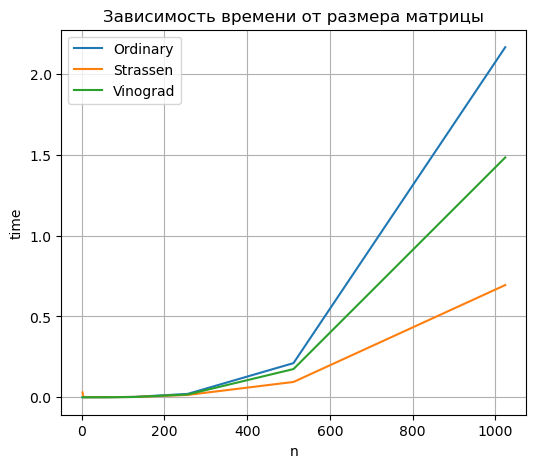

In [162]:
n = [2^i for i in 1:10]
time1 = Float64[]
time2 = Float64[]
time3 = Float64[]

strassen_bound = false

for dim in n
    println(dim)
    A = generate_matrix(-10, 10, dim)
    B = generate_matrix(-10, 10, dim)

    t = time()
    C = naive_matrix_multiply(A, B)
    push!(time1, time() - t)

    t = time()
    C = strassen_main(A, B)
    push!(time2, time() - t)

    t = time()
    C = vinograd(A, B)
    push!(time3, time() - t)
end

PyPlot.figure(figsize=(6, 5))
PyPlot.title("Зависимость времени от размера матрицы")
PyPlot.xlabel("n")
PyPlot.ylabel("time")
PyPlot.plot(n, time1, label="Ordinary")
PyPlot.plot(n, time2, label="Strassen")
PyPlot.plot(n, time3, label="Vinograd")
PyPlot.grid()
PyPlot.legend()
PyPlot.show()